$$\require{mhchem}$$

# photo submission

Examples of filenames submitted:
- photo_zulissi.ipynb.jpg
- photo_zulissi_zachary W. Ulissi.jpg
- IMG5934_(chinese characters).jpg
- Zachary Ulissi(Andrew ID zulissi).jpg
- IMG_0004.jpg
- zulissi_06_625.jpg
- photo_zulissi (njdsgn529785).jpg
- DSC4892.jpg

# Introduction to the course

-   The design of processes that transform lower value feedstocks to higher value products through chemical reactions.

We answer questions such as:

1.  Can we make a product at an economical rate?
2.  How big should a reactor be to make a product at some rate?
3.  How much heat should I remove from a reactor to maintain a safe temperature?
4.  What kind of reactor gives the highest yield?
5.  etc&#x2026;

We get paid to answer those questions

-   *quantitatively*
    -   It will rarely be sufficient to qualitatively answer questions
-   with uncertainty and risk analysis
-   even when the problems are very hard




## Role of computational tools


-   Many problems are too hard to solve by hand and must be solved numerically.
    -   For these we use computational methods

-   We will extensively use Python to numerically solve problems in this course.

-   Why?
    -   Python is *free*
    -   You can use this anywhere you go
    -   Python does everything we need and much more

-   Almost every class will use and show examples of python
-   These notes will be available to you through the syllabus
-   You should make sure you can run the examples, *and that you get the same results*
-   **Ask questions when you do not understand**

-   We will extensively use jupyter notebooks in this class
    -   to read course notes
    -   to solve computational problems
    -   to document our work, analysis, and discussion



## Python examples



### A simple plot



Here we import functionality from python modules to get array math functions and to make a plot.
Put your cursor in this code block and press shift-enter.

Let us review some python documentation. Click on these links to learn more about these functions:
[numpy.linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
[numpy.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)

[matplotlib.pyplot.plot](https://www.google.com/#safe=off&q=matplotlib.pyplot.plot)
[matplotlib.pyplot.xlabel](https://www.google.com/#safe=off&q=matplotlib.pyplot.xlabel)
[matplotlib.pyplot.ylabel](https://www.google.com/#safe=off&q=matplotlib.pyplot.ylabel)
[matplotlib.pyplot.savefig](https://www.google.com/#safe=off&q=matplotlib.pyplot.savefig)



50
[[file:pyshow/e87bde696e00d9285b2724d271fb82d6b8730236.png]]


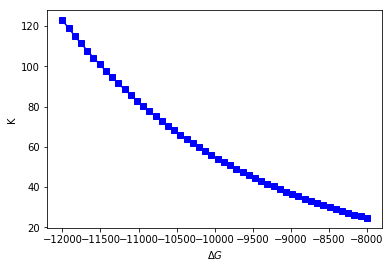

In [11]:
import numpy as np               # standard import for array functions
import matplotlib.pyplot as plt  # standard import for plotting

# Define some constants
R = 8.314   # A float
T = 300     # an integer

# an array of values linearly spaced
deltaG = np.linspace(-8000, -12000, num=50)

print(len(deltaG))

# plotting commands
plt.plot(deltaG, np.exp(-deltaG / R / T), 'bs-')
plt.xlabel('$\Delta G$')  # Note the $ $
plt.ylabel('K')
#plt.savefig('images/K.png')
plt.show()

### Solve nonlinear equations



Suppose we know K at some temperature, and we want to compute the corresponding $\Delta G$? Say we know K = 100 at 300K.  We need to solve $100 = e^{-\Delta G/RT}$ for $\Delta G$ at T = 300 K. Numerically,  we need to find the value of $\Delta G$ that solves this equivalent equation:

$$0 = 100 - e^{-\Delta G/RT}$$

We have to provide a guess for the solution because this is a nonlinear function we are solving. We could solve this problem analytically, but we are not going to. Instead, we will use the analytical solution to show our numerical solution is correct.

[scipy.optimize.fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

Put your cursor in this code block and press shift+enter to run the block.



You can see the two solutions are equivalent. Checkout [numpy.log](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html)



### Solving another nonlinear algebra problem



Given $C_A = C_{A0} e^{-k t}$ with $C_{A0} =1$ mol/L, and $k=0.23$ 1/s, how long will it take before $C_A$ = 0.2 M? We want to know at what time is this equation true: $0.2 - C_{A0} e^{-k t} = 0$. We define two functions here, one for $C_A$, and one for the objective function ($f(x)=0$). That is so we can evaluate $C_A(t_{soln})$ conveniently later.



In [12]:
import numpy as np
from scipy.optimize import fsolve

CA0 = 1.0  # mol / l
k = 0.23  # 1/s


def Ca(t):
    return CA0 * np.exp(-k * t)


def f(t):
    z = 0.2 - Ca(t)
    return z


ans, d, flag, msg = fsolve(f, 2.0, full_output=1)
print(ans)

print('Ca = {1} at t = {0:1.2f} s ({1})'.format(ans[0], Ca(ans)))

[6.99755614]
Ca = [0.2] at t = 7.00 s ([0.2])


You should practice with these examples. Review these links:

[scipy.optimize.fsolve](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html)

[numpy.exp](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)  [numpy.log](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html)



# Debugging example


# The Basics - isothermal reactor design with single reactions




## Chemical reactions



-   Chemical reaction transform reactants to products.

Consider a reaction
$\ce{a A + bB + \cdots -> q Q + sS + \cdots}$

-   symbols on the left are reactants

-   symbols on the right are products

-   The lower case letters are stoichiometric coefficients
    -   Stoichiometric coefficients relate the amounts of each reactant that react to the amounts of products produced

-   The upper case letters are symbols for reactant and product species

-   For specificity let us consider

\begin{equation}
\ce{aA + bB -> cC + dD }
\end{equation}

-   We will express this reaction as:

\begin{equation}
0 = \alpha_3 A_3 + \alpha_4 A_4  - \alpha_1 A_1 - \alpha_2 A_2
\end{equation}

where we have substituted $A = A_1$ and $a = \alpha_1$, $C = A_3$ and $c = \alpha_3$, etc&#x2026;

-   In the most compact form we might write this as a sum over all $N$ species for a reaction:

\begin{equation}
\sum_{i=0}^{N-1} \alpha_i A_i = 0
\end{equation}

where $\alpha_i$ is the stoichiometric coefficient (negative for reactants, positive for products), or more preferrably in matrix equation form:

\begin{equation}
\vec{\alpha} \cdot \vec{A} = 0
\end{equation}

where $\vec{\alpha}$ is the vector of stoichiometric coefficients, and $\vec{A}$ is the vector of chemical species.

-   It is conventional that the stoichiometric coefficients of reactants are negative and for products the stoichiometric coefficients are positive.

-   Atoms cannot be destroyed in non-nuclear chemical reactions, hence it follows that the same number of atoms entering a reactor must also leave the reactor. The atoms may leave the reactor in a different molecular configuration due to the reaction, but the total mass leaving the reactor must be the same.

-   We consider the water gas shift reaction:

\begin{equation}
\ce{ CO + H2O <=> H2 + CO2}
\end{equation}

-   The total mass at any time will be $M_{CO} + M_{H_2O} + M_{H_2} + M_{CO_2}$.
    -   These are related to the number of moles of each species through the species molecular weights.

-   Let $\vec{N}$ be a vector that is the number of moles of each species. Then, the total mass is: $\vec{N} \cdot \vec{MW}$.

-   Stoichiometry constrains the relationship between the moles of each species during reaction.

-   Suppose we start with this initial number of moles of each species: $[N_0, N_0, 0, 0]$.
    -   Now, if $n$ moles of A\_1 reacts, we know that $n$ moles of A\_2 react, and $n$ moles of A\_3 and A\_4 are produced.
    -   In otherwords, the new number of moles of each species is: $\vec{N_0} + n\vec{\alpha}$. And the new mass is correspondingly: $(\vec{N_0} + n\vec{\alpha}) \cdot \vec{MW}$ or: $M_0 + n\vec{\alpha}\cdot\vec{MW}$.

-   In a properly balanced chemical reaction, there are the same number of each type of atom on each side of the reaction, so the sum of molecular weights of reactants must be the same as products, and $\vec{\alpha}\vec{MW}=0$. Therefore, the total mass does not change for any $n$!

-   We can illustrate the conservation of mass with the following equation: $\vec{\alpha}\vec{MW}=0$. Where $\vec{\alpha}$ is the stoichiometric coefficient vector and $\vec{MW}$ is a column vector of molecular weights.

-   For simplicity, we use pure isotope molecular weights, and not the isotope-weighted molecular weights. This equation simply examines the mass on the right side of the equation and the mass on left side of the equation.

[numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)
[numpy.dot](https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html)
[range](https://www.google.com/#safe=off&q=range)



In [13]:
print(list(range(4)))

[0, 1, 2, 3]


In [14]:
import numpy as np
import pycse.orgmode as org

# stoichiometric vector for
# CO + H2O -> H2 + CO2
alpha = np.array([-1, -1, 1, 1])

MW = np.array([28, 18, 2, 44])     # Molecular weights gm/mol

print('1. ', np.dot(alpha, MW))

print('2. ', np.sum([a * m for a, m in zip(alpha, MW)]))

# Here is some old-fashioned code to do the same thing. do not do
# this. even though it works:
total = 0
for i in [0, 1, 2, 3]:
    total = total + alpha[i] * MW[i]
print('3. ', total)

# Kudos if you thought of this:
import operator
print('4. ', sum(map(operator.mul, alpha, MW)))
# This is called functional programming

# This is the new syntax in Python 3 for matrix multiplication
print('5. ', alpha @ MW)

# Note * is an element-wise multiplication for arrays. Arrays are not the same as lists.
print('6. ', sum(alpha * MW))
print(alpha * MW)  # in matlab this is alpha .* MW

1.  0
2.  0
3.  0
4.  0
5.  0
6.  0
[-28 -18   2  44]


In [15]:
import numpy as np
a = np.array([1, 2, 3])

print(2 * a)


print(np.dot([1, 1, 1], [2, 2, 2]))

[2 4 6]
6


Stoichiometry also determines if the total number of moles in a reaction change. Even though the total mass is constant, the total number of moles may change. Here are three examples showing how this is possible.

1.  $\ce{CO + H_2O -> H2 + CO2}$ (no total mole change)
2.  $\ce{H2O -> H2 + 1/2 O2}$ (Total moles increase by 0.5 mol per mol water reacted)
3.  $\ce{N2 + 3H2 -> 2NH3}$ (Total moles decrease by two moles for every mole of N\_2 reacted)

The change in number of moles is given by 
\begin{align*}
\overline{\alpha} = \sum_{i=0}^N \alpha_i
\end{align*}



In [16]:
import numpy as np
# Water-gas shift
alpha = np.array([-1, -1, 1, 1]);  # stoichiometric vector for CO +
                                   # H2O -> H2 + CO2
print('Change in moles for the WGS = {0} moles'.format(sum(alpha)))

alpha = np.array([-1, 1, 0.5]) # H2O -> H2 + 1/2 O2
print('Change in moles for water splitting = {0} moles'.format(sum(alpha)))

alpha = np.array([-1, -3, 2]) # N2 + 3H2 -> 2 NH3
print('Change in moles for the ammonia synthesis = {} moles'.format(sum(alpha)))

Change in moles for the WGS = 0 moles
Change in moles for water splitting = 0.5 moles
Change in moles for the ammonia synthesis = -2 moles


Changing the total number of moles in a reaction will have a big effect in gas phase reactions because it results in changing volumetric flow rates. We will come back to this later.




## Reaction extent



-   We now consider formalizing the change in moles of each species when reactions occur. Consider:

\begin{equation}
2 \;{H_2} + \;{O_2} \rightarrow 2 \;{H_2O}
\end{equation}

which we write as:

\begin{equation}
0 = 2 A_3 - 2 A_1 - A_2
\end{equation}

-   If we start with $N_{A_1,0}$ moles at some time, and later have $N_{A_1}$ moles later, then stoichiometry dictates that:

\begin{equation}
\frac{N_{A_1} - N_{A_1,0}}{-2} = \frac{N_{A_2} - N_{A_2,0}}{-1} = \frac{N_{A_3} - N_{A_3,0}}{2} = X
\end{equation}

-   We call $X$ the extent of reaction, and it has units of moles. We can show generally that:

\begin{equation}
N_J = N_{J,0} + \alpha_J X
\end{equation}

or for a flow system:

\begin{equation}
F_J = F_{J,0} + \alpha_J X
\end{equation}

-   $X$ has units of mol/time for dimensional consistency in a flow system

-   Note that the extent of reaction as written is extensive, and depends on how the reaction is written through the stoichiometric coefficients. It does not, however, depend on a particular species.

-   If we have a constant volume reactor and a constant volumetric flow, we can use an intensive reaction extent:

\begin{equation}
C_J = C_{J,0} + \alpha_J \xi
\end{equation}

$\xi$ is now an intensive reaction extent $X/V$, with units of mol / vol.

or $\xi'$ is now an intensive reaction extent $X/\nu$, with units of mol / vol / time.

-   Note that there are limits on the maximum value of $\xi$ because we cannot have negative concentrations. If we set $C_J$ to zero, we derive

\begin{equation}
\xi_{max} = -\frac{C_{J,0}}{\alpha_J}
\end{equation}

-   If there are multiple reactants present, then you must pick the smallest positive (non-zero) $\xi_{max}$ to avoid getting negative concentrations of one species.

-   Consider this reaction:

$\ce{H2 + 1/2 O2 -> H2O}$

If you start with 0.55 mole of $H_2$, and 0.2 mol of $O_2$. What is $\xi_{max}$?



In [17]:
import numpy as np

M0 = np.array([0.55, 0.2])
alpha = np.array([-1.0, -0.5])

species = ['H2', 'O2']

for sp, x in zip(species, -M0 / alpha):
#    print('{0:4s}{1:1.2f}'.format(sp, x))
    print('{0}  {1}'.format(sp, x))

print('The maximum extent is {0} moles.'.format(min(- M0 / alpha)))

H2  0.55
O2  0.4
The maximum extent is 0.4 moles.


Now for that extent, what is the reaction compostion? Let us work it out.  [zip](https://www.google.com/#safe=off&q=zip)



In [18]:
import numpy as np

M0 = np.array([0.55, 0.2, 0.0])
alpha = np.array([-1.0, -0.5, 1.0])

xi = 0.4

M = M0 + alpha * xi
species = ['H2', 'O2', 'H2O']

for a, b in zip(species, M):
    print('{0:5s} {1:1.2f} moles'.format(a, b))

H2    0.15 moles
O2    0.00 moles
H2O   0.40 moles


-   You can see that at that extent we have consumed all of the oxygen. We would call that the limiting reagent, because the reaction cannot proceed further since one of the reactants is gone.

-   Rather than work in terms of reaction extents, you may choose to define a fractional extent:

\begin{equation}
\Xi = \xi / \xi_{max}
\end{equation}

which leads upon substitution to:

\begin{equation}
C_J = C_{J,0}(1 - \Xi)
\end{equation}

-   This new quantity $\Xi$ is sometimes referred to as conversion. Conversion has the nice property of being dimensionless, and bounded between 0 and 1.




# Recommended exercises



Repeat [extent-composition](extent-composition)in fractional extent and conversion.



# Submission example on gradescope